<a href="https://colab.research.google.com/github/Nick6154-dev/scrapy-model/blob/main/Scrapy_Data_YouTube_Views.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
# Instalación de las librerias o dependencias necesarias
!pip install pandas seaborn matplotlib scikit-learn

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns # Para graficación
from sklearn.cluster import KMeans # Para el modelamiento

In [11]:
# Ubicacion del archivo de datos
url = 'statsYoutubeViews.csv'

In [12]:
# Se carga el archvio csv con pandas DataFrame
data = pd.read_csv(url) # Recupera los datos en formato csv a tipo dataframe (Estructura de datos bidimensional)
data.head() # Visualiza los 5 primeros datos del dataframe

,Unnamed: 0,N.º,Nombre,Canal de Youtube,Visualizaciones,Publicaciones,Origen
0,0,1,Axel F (2005),Crazy Frog,4.095 millones,16 de junio de 2009,Suecia Suecia
1,1,2,The Gummy Bear Song,Icanrockyourworld,3.201 millones,9 de octubre de 2007,Estados Unidos
2,2,3,Numb (2003),Linkin Park,2.094 millones,5 de marzo de 2007,Estados Unidos
3,3,4,November Rain (1992),Guns N' Roses,2.092 millones,25 de diciembre de 2009,Estados Unidos
4,4,5,Bad Romance,Lady Gaga,1.746 millones,24 de noviembre de 2009,Estados Unidos


In [13]:
# Visualizamos el DataFrame
data

,Unnamed: 0,N.º,Nombre,Canal de Youtube,Visualizaciones,Publicaciones,Origen
0,0,1,Axel F (2005),Crazy Frog,4.095 millones,16 de junio de 2009,Suecia Suecia
1,1,2,The Gummy Bear Song,Icanrockyourworld,3.201 millones,9 de octubre de 2007,Estados Unidos
2,2,3,Numb (2003),Linkin Park,2.094 millones,5 de marzo de 2007,Estados Unidos
3,3,4,November Rain (1992),Guns N' Roses,2.092 millones,25 de diciembre de 2009,Estados Unidos
4,4,5,Bad Romance,Lady Gaga,1.746 millones,24 de noviembre de 2009,Estados Unidos
...,...,...,...,...,...,...,...
159,159,6,Flowers,Miley Cyrus,650 millones,12 de enero de 2023,Estados Unidos
160,160,7,Rating Strangers Shots (Crazy Fail compilation...,Tuvok12,635 millones,11 de marzo de 2023,Francia
161,161,8,Me Eating a Vitamin 🤣,dednahype,635 millones,29 de mayo de 2023,Letonia Letonia
162,162,9,Un x100to,Grupo Frontera x Bad Bunny,632 millones,17 de abril de 2023,Estados Unidos Puerto Rico Puerto Rico


In [14]:
# Remove unnecesary cols and rows
# https://www.educative.io/answers/how-to-delete-a-column-in-pandas
# https://sparkbyexamples.com/pandas/pandas-drop-multiple-columns-by-index
# data.drop('a', inplace=True, axis=1)
data = data.drop(data.columns[[0]],axis = 1) # Eliminamos la primera columna
data = data.dropna(axis=0) # Eliminamos la primera fila
data = data.drop(data.index[:10]) # Eliminamos las 10 filas siguientes que no contienen datos relevantes para el analisis
data

,N.º,Nombre,Canal de Youtube,Visualizaciones,Publicaciones,Origen
10,N.º,Nombre,Canal de YouTube,Visualizaciones,Publicación,Origen
11,1,Waka Waka (This Time for África),Shakira feat. Freshlyground,3.800 millones,4 de junio de 2010,Colombia Colombia Sudáfrica
12,2,Baby,Justin Bieber ft. Ludacris,3.061 millones,19 de febrero de 2010,Canadá Canadá Estados Unidos
13,3,Love The Way You Lie,Eminem feat. Rihanna,2.714 millones,5 de agosto de 2010,Estados Unidos Barbados Barbados
14,4,Rolling in the Deep,Adele,2.403 millones,30 de noviembre de 2010,Reino Unido Reino Unido
...,...,...,...,...,...,...
159,6,Flowers,Miley Cyrus,650 millones,12 de enero de 2023,Estados Unidos
160,7,Rating Strangers Shots (Crazy Fail compilation...,Tuvok12,635 millones,11 de marzo de 2023,Francia
161,8,Me Eating a Vitamin 🤣,dednahype,635 millones,29 de mayo de 2023,Letonia Letonia
162,9,Un x100to,Grupo Frontera x Bad Bunny,632 millones,17 de abril de 2023,Estados Unidos Puerto Rico Puerto Rico


In [15]:
# Segmento para eliminar aquellas filas que aun contengan las etiquetas

# Condicion para eliminar las filas
row_to_delete = ['N.º','Nombre','Canal de YouTube','Visualizaciones','Publicación','Origen']

# Crea una condición booleana para identificar las filas a eliminar
condicion_eliminar = (data == row_to_delete).all(axis=1)

# Crea un nuevo DataFrame excluyendo las filas que coinciden con 'row_to_delete'
clean_data = data[~condicion_eliminar]

clean_data

,N.º,Nombre,Canal de Youtube,Visualizaciones,Publicaciones,Origen
11,1,Waka Waka (This Time for África),Shakira feat. Freshlyground,3.800 millones,4 de junio de 2010,Colombia Colombia Sudáfrica
12,2,Baby,Justin Bieber ft. Ludacris,3.061 millones,19 de febrero de 2010,Canadá Canadá Estados Unidos
13,3,Love The Way You Lie,Eminem feat. Rihanna,2.714 millones,5 de agosto de 2010,Estados Unidos Barbados Barbados
14,4,Rolling in the Deep,Adele,2.403 millones,30 de noviembre de 2010,Reino Unido Reino Unido
15,5,Just the Way You Are,Bruno Mars,1.900 millones,8 de septiembre de 2010,Estados Unidos
...,...,...,...,...,...,...
159,6,Flowers,Miley Cyrus,650 millones,12 de enero de 2023,Estados Unidos
160,7,Rating Strangers Shots (Crazy Fail compilation...,Tuvok12,635 millones,11 de marzo de 2023,Francia
161,8,Me Eating a Vitamin 🤣,dednahype,635 millones,29 de mayo de 2023,Letonia Letonia
162,9,Un x100to,Grupo Frontera x Bad Bunny,632 millones,17 de abril de 2023,Estados Unidos Puerto Rico Puerto Rico


In [16]:
# Creamos una nueva columna llamada Año, donde se formatea la columna Publicaciones, esto hara que sea mas facil trabajar con la fecha
clean_data['Año'] = clean_data['Publicaciones'].str.extract('(\d{4})', expand=False)
clean_data

<ipython-input-16-c36986d85cc3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_data['Año'] = clean_data['Publicaciones'].str.extract('(\d{4})', expand=False)


,N.º,Nombre,Canal de Youtube,Visualizaciones,Publicaciones,Origen,Año
11,1,Waka Waka (This Time for África),Shakira feat. Freshlyground,3.800 millones,4 de junio de 2010,Colombia Colombia Sudáfrica,2010
12,2,Baby,Justin Bieber ft. Ludacris,3.061 millones,19 de febrero de 2010,Canadá Canadá Estados Unidos,2010
13,3,Love The Way You Lie,Eminem feat. Rihanna,2.714 millones,5 de agosto de 2010,Estados Unidos Barbados Barbados,2010
14,4,Rolling in the Deep,Adele,2.403 millones,30 de noviembre de 2010,Reino Unido Reino Unido,2010
15,5,Just the Way You Are,Bruno Mars,1.900 millones,8 de septiembre de 2010,Estados Unidos,2010
...,...,...,...,...,...,...,...
159,6,Flowers,Miley Cyrus,650 millones,12 de enero de 2023,Estados Unidos,2023
160,7,Rating Strangers Shots (Crazy Fail compilation...,Tuvok12,635 millones,11 de marzo de 2023,Francia,2023
161,8,Me Eating a Vitamin 🤣,dednahype,635 millones,29 de mayo de 2023,Letonia Letonia,2023
162,9,Un x100to,Grupo Frontera x Bad Bunny,632 millones,17 de abril de 2023,Estados Unidos Puerto Rico Puerto Rico,2023


In [17]:
# Convertimos a tipo integer Año
clean_data['Año'] = pd.to_numeric(clean_data['Año'], errors='coerce', downcast='integer')
clean_data

<ipython-input-17-3ce4148954ac>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_data['Año'] = pd.to_numeric(clean_data['Año'], errors='coerce', downcast='integer')


,N.º,Nombre,Canal de Youtube,Visualizaciones,Publicaciones,Origen,Año
11,1,Waka Waka (This Time for África),Shakira feat. Freshlyground,3.800 millones,4 de junio de 2010,Colombia Colombia Sudáfrica,2010.0
12,2,Baby,Justin Bieber ft. Ludacris,3.061 millones,19 de febrero de 2010,Canadá Canadá Estados Unidos,2010.0
13,3,Love The Way You Lie,Eminem feat. Rihanna,2.714 millones,5 de agosto de 2010,Estados Unidos Barbados Barbados,2010.0
14,4,Rolling in the Deep,Adele,2.403 millones,30 de noviembre de 2010,Reino Unido Reino Unido,2010.0
15,5,Just the Way You Are,Bruno Mars,1.900 millones,8 de septiembre de 2010,Estados Unidos,2010.0
...,...,...,...,...,...,...,...
159,6,Flowers,Miley Cyrus,650 millones,12 de enero de 2023,Estados Unidos,2023.0
160,7,Rating Strangers Shots (Crazy Fail compilation...,Tuvok12,635 millones,11 de marzo de 2023,Francia,2023.0
161,8,Me Eating a Vitamin 🤣,dednahype,635 millones,29 de mayo de 2023,Letonia Letonia,2023.0
162,9,Un x100to,Grupo Frontera x Bad Bunny,632 millones,17 de abril de 2023,Estados Unidos Puerto Rico Puerto Rico,2023.0


In [18]:
# Quitamos la palabra "millones" a la columna de "Visualizaciones"
clean_data['Visualizaciones'] = clean_data['Visualizaciones'].replace(' millones', '', regex=True)
clean_data['Visualizaciones'] = pd.to_numeric(clean_data['Visualizaciones'], errors='coerce')

clean_data

<ipython-input-18-5d4ec54e445a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_data['Visualizaciones'] = clean_data['Visualizaciones'].replace(' millones', '', regex=True)
<ipython-input-18-5d4ec54e445a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_data['Visualizaciones'] = pd.to_numeric(clean_data['Visualizaciones'], errors='coerce')


,N.º,Nombre,Canal de Youtube,Visualizaciones,Publicaciones,Origen,Año
11,1,Waka Waka (This Time for África),Shakira feat. Freshlyground,3.800,4 de junio de 2010,Colombia Colombia Sudáfrica,2010.0
12,2,Baby,Justin Bieber ft. Ludacris,3.061,19 de febrero de 2010,Canadá Canadá Estados Unidos,2010.0
13,3,Love The Way You Lie,Eminem feat. Rihanna,2.714,5 de agosto de 2010,Estados Unidos Barbados Barbados,2010.0
14,4,Rolling in the Deep,Adele,2.403,30 de noviembre de 2010,Reino Unido Reino Unido,2010.0
15,5,Just the Way You Are,Bruno Mars,1.900,8 de septiembre de 2010,Estados Unidos,2010.0
...,...,...,...,...,...,...,...
159,6,Flowers,Miley Cyrus,650.000,12 de enero de 2023,Estados Unidos,2023.0
160,7,Rating Strangers Shots (Crazy Fail compilation...,Tuvok12,635.000,11 de marzo de 2023,Francia,2023.0
161,8,Me Eating a Vitamin 🤣,dednahype,635.000,29 de mayo de 2023,Letonia Letonia,2023.0
162,9,Un x100to,Grupo Frontera x Bad Bunny,632.000,17 de abril de 2023,Estados Unidos Puerto Rico Puerto Rico,2023.0


In [19]:
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 145 entries, 11 to 163
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   N.º               145 non-null    object 
 1   Nombre            145 non-null    object 
 2   Canal de Youtube  145 non-null    object 
 3   Visualizaciones   140 non-null    float64
 4   Publicaciones     145 non-null    object 
 5   Origen            145 non-null    object 
 6   Año               140 non-null    float64
dtypes: float64(2), object(5)
memory usage: 9.1+ KB


In [21]:
# Exportamos la tabla trabajada en un nuevo csv
clean_data.to_csv('statsYoutubeViewsCleaned.csv')

In [35]:
# Ubicacion del archivo de datos
url = 'statsYoutubeViewsCleaned.csv' # external url?

In [37]:
# Se carga el archvio csv con pandas DataFrame
data = pd.read_csv(url) # Recupera los datos en formato csv a tipo dataframe (Estructura de datos bidimensional)
data

,Unnamed: 0,N.º,Nombre,Canal de Youtube,Visualizaciones,Publicaciones,Origen,Año
0,11,1,Waka Waka (This Time for África),Shakira feat. Freshlyground,3.800,4 de junio de 2010,Colombia Colombia Sudáfrica,2010
1,12,2,Baby,Justin Bieber ft. Ludacris,3.061,19 de febrero de 2010,Canadá Canadá Estados Unidos,2010
2,13,3,Love The Way You Lie,Eminem feat. Rihanna,2.714,5 de agosto de 2010,Estados Unidos Barbados Barbados,2010
3,14,4,Rolling in the Deep,Adele,2.403,30 de noviembre de 2010,Reino Unido Reino Unido,2010
4,15,5,Just the Way You Are,Bruno Mars,1.900,8 de septiembre de 2010,Estados Unidos,2010
...,...,...,...,...,...,...,...,...
135,159,6,Flowers,Miley Cyrus,650.000,12 de enero de 2023,Estados Unidos,2023
136,160,7,Rating Strangers Shots (Crazy Fail compilation...,Tuvok12,635.000,11 de marzo de 2023,Francia,2023
137,161,8,Me Eating a Vitamin 🤣,dednahype,635.000,29 de mayo de 2023,Letonia Letonia,2023
138,162,9,Un x100to,Grupo Frontera x Bad Bunny,632.000,17 de abril de 2023,Estados Unidos Puerto Rico Puerto Rico,2023


In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140 entries, 0 to 139
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        140 non-null    int64  
 1   N.º               140 non-null    int64  
 2   Nombre            140 non-null    object 
 3   Canal de Youtube  140 non-null    object 
 4   Visualizaciones   140 non-null    float64
 5   Publicaciones     140 non-null    object 
 6   Origen            140 non-null    object 
 7   Año               140 non-null    int64  
dtypes: float64(1), int64(3), object(4)
memory usage: 8.9+ KB


In [39]:
# Eliminamos la primera fila
data = data.drop(data.columns[[0]],axis = 1)

In [40]:
data

,N.º,Nombre,Canal de Youtube,Visualizaciones,Publicaciones,Origen,Año
0,1,Waka Waka (This Time for África),Shakira feat. Freshlyground,3.800,4 de junio de 2010,Colombia Colombia Sudáfrica,2010
1,2,Baby,Justin Bieber ft. Ludacris,3.061,19 de febrero de 2010,Canadá Canadá Estados Unidos,2010
2,3,Love The Way You Lie,Eminem feat. Rihanna,2.714,5 de agosto de 2010,Estados Unidos Barbados Barbados,2010
3,4,Rolling in the Deep,Adele,2.403,30 de noviembre de 2010,Reino Unido Reino Unido,2010
4,5,Just the Way You Are,Bruno Mars,1.900,8 de septiembre de 2010,Estados Unidos,2010
...,...,...,...,...,...,...,...
135,6,Flowers,Miley Cyrus,650.000,12 de enero de 2023,Estados Unidos,2023
136,7,Rating Strangers Shots (Crazy Fail compilation...,Tuvok12,635.000,11 de marzo de 2023,Francia,2023
137,8,Me Eating a Vitamin 🤣,dednahype,635.000,29 de mayo de 2023,Letonia Letonia,2023
138,9,Un x100to,Grupo Frontera x Bad Bunny,632.000,17 de abril de 2023,Estados Unidos Puerto Rico Puerto Rico,2023


In [41]:
# Matriz de correlaciones
data[['N.º','Visualizaciones', 'Año']].corr().style.background_gradient(cmap='coolwarm').set_precision(2)

<ipython-input-41-67416d67f1f0>:1: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  data[['N.º','Visualizaciones', 'Año']].corr().style.background_gradient(cmap='coolwarm').set_precision(2)


,N.º,Visualizaciones,Año
N.º,1.00,0.12,0.00
Visualizaciones,0.12,1.00,0.61
Año,0.00,0.61,1.00


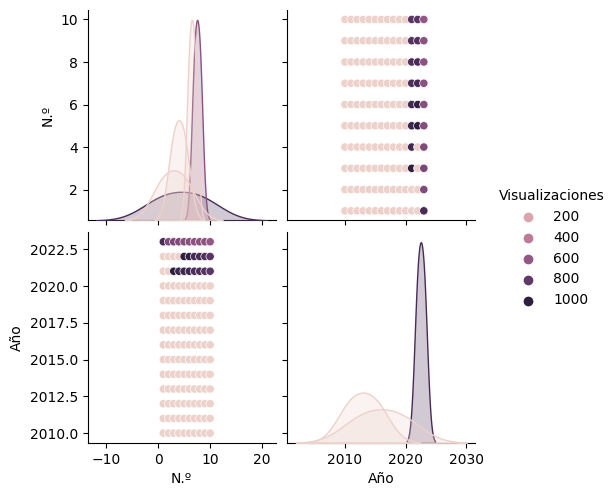

In [42]:
# Grafica de correlaciones respecto a las Visualizaciones
sns.pairplot(data,hue="Visualizaciones")

In [43]:
# Seleccción de variables significativas
sel_data = data[['Visualizaciones','Año']]
sel_data

,Visualizaciones,Año
0,3.800,2010
1,3.061,2010
2,2.714,2010
3,2.403,2010
4,1.900,2010
...,...,...
135,650.000,2023
136,635.000,2023
137,635.000,2023
138,632.000,2023


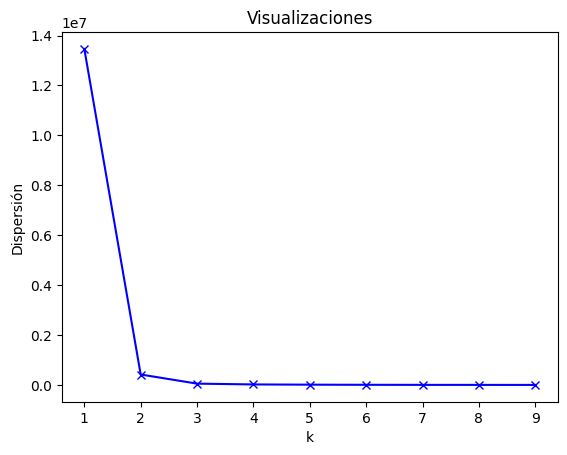

In [45]:
# Analsis de Dispersión por método de Codo
def plot_dispersion(x, figure_name, max_k = 10, n_init = 10):
    inertia = []

    for k in range(1, max_k):
        kmeans = KMeans(n_clusters = k, n_init = n_init).fit(x)
        inertia.append(kmeans.inertia_)

    plt.plot(range(1, max_k), inertia, 'bx-')
    plt.xlabel('k')
    plt.ylabel(u'Dispersión')
    plt.title(figure_name)

plot_dispersion(sel_data, 'Visualizaciones')